# CS 449 Final Project Update

Due: May 23, 2023 at 11:59pm

## 1. Names and Net IDs

Larina Chen (lcx2942), Winston Ding (wmd5298), Christian Benjamin Duffee  (cbd2602), Jack Wheeler (jnw9832)

## 2. Abstract

Our project seeks to implement a single, conditional Generative Adversarial Network (cGAN) to generate a dataset of synthetic chest X-ray images containing 2 classes: 1) normal chest X-rays, and 2) bacterial pneumonia-detected chest X-rays. The class information for each image will be passed to both the generator and discriminator in the form of a one hot encoded vector. Ideally, the generated images will be indistinguishable from real X-rays while not being direct copies from the dataset. 

dataset: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia 

## 3. Big Changes

We initially planned to train separate GANs for each class of x-ray, but upon receiving advice from our project mentor, we've decided to train a single, conditional GAN instead. This change will allow a single model to generate synthetic images of both classes, but it will require us to include the image class information as input to the generator and discriminator. 

## 4a. Describe your dataset(s)

*This should be an updated version of your datasets section from your proposal. Write this section as if the reader hasn't read your original proposal. List the datasets you're using, where you found them, and what they contain. Be detailed! For each dataset, what does the data look like? What is the data representation? (e.g., what resolution of images? what length of sequences?) How is the data annotated or labeled? Include citations for the datasets. Include at least one citation of previous work that has used this data, or an explanation of why it hasn't been used before*

This dataset contains 5,863 monochromatic jpg images of variable sizes. Each image is a chest x-ray of a child, between one and five years old, who received routine care from the Guangzhou Women and Children’s Medical Center. Each x-ray image has the letter “R” in white superimposed onto it, typically off to the side of the image. The dataset is split between normal, bacterial pneumonia, and viral pneumonia images. Counts of each class were not provided, although there are about an equal number of normal and viral pneumonia x-rays and about twice as many bacterial pneumonia x-rays. This dataset was used by Kermany et al. who achieved an accuracy of 92.8%, a sensitivity of 93.2%, and specificity of 90.1% in classifying pneumonia vs normal data. Separately, they were also able to have an accuracy of 90.7%, a sensitivity of 88.6%, and specificity of 90.9% in classifying bacterial pneumonia vs viral pneumonia.

## 4b. Load your dataset(s)

*Load at least a few examples and visualize them as best you can*

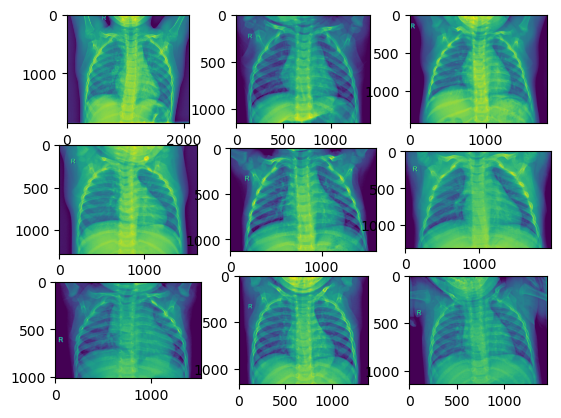

[[ 22  24  24 ...  96  94  93]
 [ 23  24  24 ...  97  94  92]
 [ 24  24  23 ...  99  96  94]
 ...
 [ 49  50  48 ... 119 119 119]
 [ 50  52  53 ... 123 124 123]
 [ 52  53  54 ... 129 128 127]]


In [1]:
from PIL import Image
from matplotlib import image, pyplot
import numpy as np
import os 
import sys

image1 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0115-0001.jpeg"))
image2 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0117-0001.jpeg"))
image3 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0119-0001.jpeg"))
image4 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0122-0001.jpeg"))
image5 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0125-0001.jpeg"))
image6 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0127-0001.jpeg"))
image7 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0128-0001.jpeg"))
image8 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0129-0001.jpeg"))
image9 = image.imread(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0131-0001.jpeg"))


fig, axes = pyplot.subplots(3,3)

axes[0][0].imshow(image1)
axes[0][1].imshow(image2)
axes[0][2].imshow(image3)
axes[1][0].imshow(image4)
axes[1][1].imshow(image5)
axes[1][2].imshow(image6)
axes[2][0].imshow(image7)
axes[2][1].imshow(image8)
axes[2][2].imshow(image9)

#pyplot.imshow(image)
pyplot.show()

image_data = Image.open(os.path.join(sys.path[0], "NORMAL_TRAIN/IM-0115-0001.jpeg"))
image_data = np.asarray(image_data)
print(image_data)

## 4c. Small dataset

*Describe the small dataset you constructed as requested in the project proposal. How many examples did you use? How large was the dataset in total?*

From our initial dataset, we will be creating a smaller dataset consisting of 100 images depicting x-rays of patients with pneumonia caused by a bacteria infection and 100 images of patients without pneumonia. Out of the initial ~2600 images that were originally provided, we will first sort the images by image size to get an idea of which image dimensions appear the most in the dataset. We will then choose a random sample of 100 images from each category of similar size to use for the dataset that are each around 50kb in size. 

## 5. Updated Methods

*This should be an updated version of your methods section from your proposal. Write this section as if the reader hasn't read your original proposal. For example:*

> This is a standard supervised learning task, and we will use `sklearn` and `torch` models to predict what kind of clothing appears in small images. The `sklearn` model will contain one weight per pixel, but our `torch` models will contain millions of weights. We will train our model using Cross-Entropy loss, because...

We are using a Conditional Generative Adversarial Network (cGAN), which is composed of a discriminator model and a generator model. The generator model minimizes its loss function defined by producing images that the discriminator model will classify as real data of a provided class. The discriminator acts as a convolutional neural network in our case, as we are working with medical imaging data. (Source: Synthetic Medical Images from Dual Generative Adversarial Networks). The core difference between a cGAN and a GAN is the extra information that the network is conditioned on, which is passed as the variable “y” to both the discriminator and the generator in the equation below (see “Conditional Generative Adversarial Nets”). The conditional usage of the variable y represents switching between generating images for pneumonia and without pneumonia which allows us to compare the effectiveness of the cGAN on these two classes.

<img src = "proposal_figures/EQ1.png" /><br>
Equation 1

<br>
<img src = "proposal_figures/EQ2.png" />
<br>
Equation 2

The cross-entropy loss function was the loss function of choice to train the discriminator for the first stage of the Generative Neural Network in the “Synthetic Medical Images from Dual Generative Adversarial Networks”, where D is the discriminator model, and G is the generative model. This loss function is likely used since the paper deals with a classification problem between retinal medical image data, and since our goal is to classify between synthetically generated data and real data, the cross-entropy loss function is a viable choice.

<br>
<img src = "proposal_figures/EQ3.png" />
<br>
Equation 3

This defined loss function for the generator from the same paper is an application of taking the overall loss of the model to be the average of the how well the discriminator model is able to discern the generative model's new image data.

In the “Generative Adversarial Nets” paper, it added that Equation 3 may not be optimal to use as the loss function early in the learning process, as the discriminator function will easily reject samples from the generator much more often. Instead, the generator function may have a new loss function in the beginning to maximize log D(G(z)). 

<br>
<img src = "proposal_figures/Figure1.png" />
<br>
Figure 1

The model depicted in the “Generative Adversarial Nets” paper follows the process in Figure 1 in order to train the model.

To evaluate the effectiveness of the model, we can use a mix of qualitative and quantitative measurements in order to judge how well the model generates realistic synthetic images.

In the paper  “Evaluation of Generative Adversarial Network Performance Based on Direct Analysis of Generated Images”, the 3 main factors to consider are
The generator shouldn’t reproduce the same images that were already provided (creativity).
The generator should produce images that contain key features from the images the model was based from (inheritance).
The generator should produce a variety of images (diversity).

Possible measures to quantify these goals based from the paper are:

The Inception score: Focuses on measuring the inheritance and diversity measures. “InceptionNet(x) is the label obtained from the pre-trained Inception network by inputting image x. For all generated images, we have the label set Y. The IS index is defined:”

<br>
<img src = "proposal_figures/Equation4.png" />
<br>
Equation 4

Fréchet Inception Distance: “Instead of output labels it uses feature vectors from the final pooling layers of InceptionNet. All real and generated images are input to the network to extract their feature vectors.”

<br>
<img src = "proposal_figures/Equation5.png" />
<br>
Equation 5

1 Nearest Neighbor Classifier: A familiar and previously implemented machine learning model, where it uses a two sample test with real and generated image sets. The goal is to detect whether the model is overfitting a data set where the distribution of the synthetically generated sets are too similar to the real data, or whether the distribution is too dissimilar by an accuracy measure called the leave-one-out (LOO). However, this measure requires the size of the two datasets to be equal in size.

## 6. Proposed Deliverables

*Copy the deliverables from your proposal and write a sentence saying whether you completed this goal, made progress on this goal, or abandoned this goal. Unless you completed the goal, give an explanation of how it went.*

### 6.1 Previous Essential Goals
1. Implement a generative adversarial network model, which consists of a generator neural network and a discriminator neural network. The generative model will provide new examples based on its training set while the discriminator model will discern between original data and synthetic data produced by the generative model. 

	- 1 generator and 1 discriminator to generate X-ray images with and without bacterial pneumonia
	- We will first experiment with training the model from scratch. If we evaluate our network to be ineffective, we will pivot to testing pretrained models to improve the 	behavior of the network. The possible models we are thinking will use as pretrained models are outlined below.
		- GoogLeNet Inception: Inspired by reading 2 “Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift”, where research has been done using Inception-BN as a pretrained model for various and generalized imaging tasks.
		- DenseNet: Various medical imaging tasks have used the DenseNet architecture as a foundation for developing neural networks further. A previous x-ray task was done using this pretrained model. pretrained-model for x-ray classification
		- VGG: An accurate model for flexible image classification tasks. Although the model is large, the increased computational power of gpu accelerated processing would enable training of the model.

2. Qualitatively and quantitatively assess the images produced by the generative model by comparing the images across epochs and use the Fréchet inception distance (FID) assessment method outlined above to determine how successful the cGAN is. 

### 6.2 Previous Desired Goals
1. Determine how certain cGAN hyperparameters affect the training speed and final quality of the generated images. A select of best hyperparameters shall be chosen which generate the highest quality at a certain reasonable training time.
	- hyperparameters we are interested in:
		- Noise vector size; noise will be added to every image input to the discriminator
		- Activation function: Sigmoid vs tanh for output layer; ReLU vs LeakyReLU for intermediate layers
		- L2 regularization magnitude
		- Optimizer
		- Batch size
		- Latent size
		- Hidden layer size & number of hidden layers
		- Learning rate
	
	- We will conduct experiments with various parameters and choose best combination using Frechet Inception Distance and the Inception Score as an evaluation metric

2. Train classifiers on both the real and an expanded dataset (including synthetic data). Compare the accuracies of these classifiers. Ideally, the accuracy of the synthetic dataset trained classifier should be improved compared to the real dataset trained classifier, indicating that using cGANs is a useful method of improving the performance of classifiers in similar datasets. However, if it is decreased, then we know the cGANs are not correctly learning certain aspects of the data that are important for classification.  

### 6.3 Previous Stretch Goals
1. Determine that at what real data training set size does the addition of synthetic data increases a trained classifier’s training rate and/or accuracy. Furthermore, determine how the introduction of synthetic data changes the properties of a classifier. For instance, does it cause more type I errors even if the accuracy stays the same? 

2. Determine how we can modify the hyperparameters mentioned above to create synthetic data that can train more accurate classifiers, as this may not exactly align with the best hyperparameters for FID. 


## 7. Results So Far

*Show the results of your methods trained on your data. You should at least have empirical results for the small dataset described in 4c. Unless you are doing generation or another task where simple models (e.g., linear regression or logistic regression) aren't applicable, we strongly encourage you to compare your initial results against a simple baseline. If you have additional results, you're welcome to include those as well.*

> For example: our logistic regression baseline achieves 80% accuracy on Fashion-MNIST, and our MLP achieves 85% accuracy, when applied to our small dataset containing 1,000 subsampled images.

<br>
<img src = "update_figures/generated.png" />
<br>
Figure 2

## 8. New Deliverables

*For any proposed deliverables that you did NOT complete or abandon, copy them into these lists below. Then, if you have abandoned or completed your Desired or Stretch goals, add new goals until you have at least two goals per category.*

8.1 New Essential Goals

1. Implement a generative adversarial network model, which consists of a generator neural network and a discriminator neural network. The generative model will provide new examples based on its training set while the discriminator model will discern between original data and synthetic data produced by the generative model. 

	- 1 generator and 1 discriminator to generate X-ray images with and without bacterial pneumonia
	- We will first experiment with training the model from scratch. If we evaluate our network to be ineffective, we will pivot to testing pretrained models to improve the 	behavior of the network. The possible models we are thinking will use as pretrained models are outlined below.
		- GoogLeNet Inception: Inspired by reading 2 “Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift”, where research has been done using Inception-BN as a pretrained model for various and generalized imaging tasks.
		- DenseNet: Various medical imaging tasks have used the DenseNet architecture as a foundation for developing neural networks further. A previous x-ray task was done using this pretrained model. pretrained-model for x-ray classification
		- VGG: An accurate model for flexible image classification tasks. Although the model is large, the increased computational power of gpu accelerated processing would enable training of the model.

2. Qualitatively and quantitatively assess the images produced by the generative model by comparing the images across epochs and use the Fréchet inception distance (FID) assessment method outlined above to determine how successful the cGAN is.

Although we have already built a model for essential goal #1, we have yet to achieve sufficient results with our model or tested performance with a pretrained model. Because this first goal is not fully completed, we've decided to leave it as our top priority.

8.2 New Desired Goals

1. Determine how certain cGAN hyperparameters affect the training speed and final quality of the generated images. A select of best hyperparameters shall be chosen which generate the highest quality at a certain reasonable training time.
	- hyperparameters we are interested in:
		- Noise vector size; noise will be added to every image input to the discriminator
		- Activation function: Sigmoid vs tanh for output layer; ReLU vs LeakyReLU for intermediate layers
		- L2 regularization magnitude
		- Optimizer
		- Batch size
		- Latent size
		- Hidden layer size & number of hidden layers
		- Learning rate
	
	- We will conduct experiments with various parameters and choose best combination using Frechet Inception Distance and the Inception Score as an evaluation metric

2. Train classifiers on both the real and an expanded dataset (including synthetic data). Compare the accuracies of these classifiers. Ideally, the accuracy of the synthetic dataset trained classifier should be improved compared to the real dataset trained classifier, indicating that using cGANs is a useful method of improving the performance of classifiers in similar datasets. However, if it is decreased, then we know the cGANs are not correctly learning certain aspects of the data that are important for classification.

As we've attempted to train a model from scratch, we have experimented with many of the listed hyperparameters. However, we've yet to achieve sufficient results from the generator, and will still need to tune our hyperparameters once we've found a solution.

8.3 New Stretch Goals

1. Determine that at what real data training set size does the addition of synthetic data increases a trained classifier’s training rate and/or accuracy. Furthermore, determine how the introduction of synthetic data changes the properties of a classifier. For instance, does it cause more type I errors even if the accuracy stays the same? 

2. Determine how we can modify the hyperparameters mentioned above to create synthetic data that can train more accurate classifiers, as this may not exactly align with the best hyperparameters for FID. 

## 9. Hopes and Concerns

*What's gone well so far? What's been the hardest thing?*

> For example: we got really bored of staring at pixelated hand-written digits for hours on end.

Our hope is to learn about cGANs and how they are best used. We hope that we can visualize the progress of how the generator model creates synthetic images as the model is trained. In this case, we look forward to optimizing the hyperparameters to the model and observe how the behavior of the cGAN changes. 

We are concerned as to whether the dataset is large enough in order to effectively train the cGAN, and how the differing image sizes will affect the ability for cGAN to effectively train the model. Moreover, we noticed that X-ray images have artifacts on them (e.g. a “R” labeling) other than just the biomedical information, so we are concerned about how the cGAN would work with the artifacts. Additionally, we are concerned about Github’s repository size limit. et

## 10. References

*Cite the papers or sources that you used to discover your datasets and/or models, if you didn't include the citation above. For example:*

Goodfellow, Ian J. “Generative Adversarial Networks.” 
https://doi.org/10.48550/arXiv.1406.2661

Guibas, John T. “Synthetic Medical Images from Dual Generative Adversarial Networks.”
https://doi.org/10.48550/arXiv.1709.01872

S. Guan and M. Loew, "Evaluation of Generative Adversarial Network Performance Based on Direct Analysis of Generated Images," 2019 IEEE Applied Imagery Pattern Recognition Workshop (AIPR), Washington, DC, USA, 2019, pp. 1-5, doi: 10.1109/AIPR47015.2019.9174595.

Kermany, Daniel S., et al. "Identifying medical diagnoses and treatable diseases by image-based deep learning." cell 172.5 (2018): 1122-1131.